<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 7***
"Algebra Lineal con Python" 

---

En esta la actividad 7 de física computacional, repasaremos un poco los elementos básicos del álgebra lineal ya que de ahora en adelante realizaremos calculos algebraicos para resolver problemas y proponer soluciones a sistemas de ecuaciones utilizando funciones y herramientas de Pyhton.
En esta seccion se introducira una nueva biblioteca de Python llamada SciPy, esta contiene una serie de bibliotecas especiales de calculo que nos podrian interesar en un futuro sin embargo, para este caso solo nos enfocaremos en la scipy.linalg para trabajar con vectores y matrices.

La actividad en este caso consiste en realizar los Ejercicios 1 - 6,  que aparecen en el Cuaderno de Jupyter Notebook de este tema.

In [65]:
#Aqui introducimos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import pylab as pl

*   # ***Ejercicio 1.*** 
Definir las siguientes matrices.

\\

$
A=
\begin{bmatrix}
1 & 3 \\
-1 & 7 
\end{bmatrix}
$
;
$
B=
\begin{bmatrix}
5 & 2 \\
1 & 2 
\end{bmatrix}
$
y la matriz identidad:
$ 
I=
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
$

\\
Calcule el resultado de $2*I+3*A+A@B$

In [ ]:
A=np.array([[1,3],[-1,7]])
B=np.array([[5,2],[1,2]])
I=np.array([[1,0],[0,1]])
print('A=',A,'\n')
print('B=',B,'\n')
print('I=',I,'\n')
#Calculando el primer resultado
P1=2*I+3*A+A@B
print('Calculando: 2*I+3*A+A@B=\n',P1,'\n')

A= [[ 1  3]
 [-1  7]] 

B= [[5 2]
 [1 2]] 

I= [[1 0]
 [0 1]] 

Calculando: 2*I+3*A+A@B=
 [[13 17]
 [-1 35]] 



*   # ***Ejercicio 2.*** 
El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\\
$$

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

In [ ]:
#La matriz a utilizar para este caso sera:
A=np.array([[6, 6],[-7, 8]])
I=np.eye(2, dtype=int)
#Calculamos el determinante de la matriz A
det=la.det(A)
#Calculamos la traza de la matriz A
tr=np.trace(A)
#TEROMA DE CAYLEY-HAMILTON
P2=(det*I)-(tr*A)+(mpow(A,2))
#No existe un símbolo para denotar las potencias de matrices. Por eso definimos la función 'mpow' que nos sirve para las potencias
#Imprimimos los resultados
print("Matriz A: ")
print()
print(A)
print()
print("Determinante: ",det)
print()
print("Traza: ", tr)
print()
print("Matriz Caracteristica: ")
print()
print( P2 )

Matriz A: 

[[ 6  6]
 [-7  8]]

Determinante:  90.0

Traza:  14

Matriz Caracteristica: 

[[0. 0.]
 [0. 0.]]


*   # ***Ejercicio 3.*** 
Resuelva el sistema de ecuaciones de dos formas

$$\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}$$

utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [ ]:
#Primero definimos las funciones y operaciones necesarias para resolver el sistema de ecuaciones por el metodo de eliminación Gausseana

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

Ahora si, procedemos a resolver el sistema de ecuaciones:

$$\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}$$

In [ ]:
#Definimos el sistema de ecuaciones como una matriz
A=np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print('El sistema de ecuaciones es:\n',A,'\n')
#Creamos la matriz aumentada de la matriz A con la matriz identidad con la finalidad de obtener la matriz inversa con mayor facilidad
A1=np.hstack([A,np.eye(3)])
print('Matriz aumentada:\n',A1,'\n')

#1) R2*1/3 -----> R2
A2=scale_row(A1,1/3,1)
print('Multiplicamos el segundo renglon por 1/3 :\n',A2,'\n')
#2) (-R1)+R2 -----> R2
A3=add_row(A2,-1,1,0)
print('Multiplicamos el primer renglon por menos 1 y se lo sumamos al segundo renglon:\n',A3,'\n')
#3) R3*1/2 -----> R3
A4=scale_row(A3,1/2,2)
print('Multiplicamos el tercer renglon por 1/2:\n',A4,'\n')
#4) (R2*(-3/5))+R3 -----> R3
A5= add_row(A4,(-3/5.),2,1)
print('Multiplicamos el segundo renglon por -3/5 y se lo sumamos al tercer renglon:\n',A5,'\n')
#5) (R3*10)+R1 -----> R1
A6=add_row(A5,10.0,0,2)
print('Multiplicamos el tercer renglon por 10 y se lo sumamos al primer renglon:\n',A6,'\n')
#6) (R3*(-20/3))+R2 -----> R2
A7=add_row(A6,(-20/3),1,2)
print('Multiplicamos el tercer renglon por -20/3 y se lo sumamos al segundo renglon:\n',A7,'\n')
#7) (R2*9/5)+R1 -----> R1
A8=add_row(A7,9/5,0,1)
print('Multiplicamos el segundo renglon por 9/5 y se lo sumamos al primer renglon:\n',A8,'\n')
#8) R2*3/5 -----> R2
A9=scale_row(A8,3/5,1)
print('Multiplicamos el segundo renglon por 3/5:\n',A9,'\n')
#9) R3*(-10) -----> R3
A10=scale_row(A9,-10,2)
print('Multiplicamos el tercer renglon por -10:\n',A10,'\n')
#Finalmente hemos obtenido la matriz inversa de A
A_inv=A10[:,3:]
print('Matriz inversa de A:\n',A_inv,'\n')

El sistema de ecuaciones es:
 [[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]] 

Matriz aumentada:
 [[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]] 

Multiplicamos el segundo renglon por 1/3 :
 [[ 1.         -3.          1.          1.          0.          0.        ]
 [ 1.         -1.33333333  0.33333333  0.          0.33333333  0.        ]
 [ 0.          2.         -1.          0.          0.          1.        ]] 

Multiplicamos el primer renglon por menos 1 y se lo sumamos al segundo renglon:
 [[ 1.         -3.          1.          1.          0.          0.        ]
 [ 0.          1.66666667 -0.66666667 -1.          0.33333333  0.        ]
 [ 0.          2.         -1.          0.          0.          1.        ]] 

Multiplicamos el tercer renglon por 1/2:
 [[ 1.         -3.          1.          1.          0.          0.        ]
 [ 0.          1.66666667 -0.66666667 -1.          0.33333333  0.        ]
 [ 0.          1.         -0.5         0.          0.  

In [ ]:
#Una obtenida la matriz inversa, definimos b utilizando la función .reshape()
b=np.array([1,5,0]).reshape(3,1)
print(b)

[[1]
 [5]
 [0]]


In [ ]:
#Ahora calculamos x=A_inv @ b
x=A_inv @ b 
print('La solucion por eliminación Gausseana es:\n',x,'\n')
#Comparamos con la solución dada por la función scipy.linalg.solve
print('Comparamos las soluciones\n')
x_sol=la.solve(A,b)
print('La solución dada por scipy.linalg.solve es:\n',x_sol)

La solucion por eliminación Gausseana es:
 [[3.]
 [2.]
 [4.]] 

Comparamos las soluciones

La solución dada por scipy.linalg.solve es:
 [[3.]
 [2.]
 [4.]]


*   # ***Ejercicio 4.*** 
Dadas las siguientes matrices $B_1, B_2$ y $B_3$

$$\begin{equation*}
B_1=\begin{bmatrix}
2 & 0 & 0\\
0 & 3 & 4\\
0 & 4 & 9\\
\end{bmatrix}
\end{equation*}$$
\
$$\begin{equation*}
B_2=\begin{bmatrix}
0 & 1 & 0\\
0 & 0 & 1\\
1 & 0 & 0\\
\end{bmatrix}
\end{equation*}$$
\
$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0\\
0 & 1 & 3 & 0\\
0 & 0 & 1 & 3\\
\end{bmatrix}
\end{equation*}$$
\
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.


In [3]:
#Definimos la cada una de las matrices para despues proceder a calcular sus eingenvectores y eigenvalores

#Definimos la Matriz B1
B1=np.array([[2,0,0],
              [0,3,4],
              [0,4,9]])
print("Matriz B1\n",B1)
#Definimos los eigenvectores y eingenvalores para B1
eigvalsB1, eigvecsB1 = la.eig(B1)
print()
print('Eigenvalores:', eigvalsB1)
print()
print('Eigenvectores:\n')
v1 = eigvecsB1[:,0]
v2 = eigvecsB1[:,1]
v3 = eigvecsB1[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B1
 [[2 0 0]
 [0 3 4]
 [0 4 9]]

Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]

Eigenvectores:

v1= [0.         0.4472136  0.89442719]
v2= [ 0.          0.89442719 -0.4472136 ]
v3= [1. 0. 0.]


In [4]:
#Ahora definimos la Matriz B2
B2=np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])
print("Matriz B2\n",B2)
#Definimos los eigenvectores y eingenvalores para B2
eigvalsB2, eigvecsB2 = la.eig(B2)
print()
print('Eigenvalores:', eigvalsB2)
print()
print('Eigenvectores:\n')
v1 = eigvecsB2[:,0]
v2 = eigvecsB2[:,1]
v3 = eigvecsB2[:,2]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)

Matriz B2
 [[0 1 0]
 [0 0 1]
 [1 0 0]]

Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]

Eigenvectores:

v1= [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
v2= [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
v3= [-0.57735027+0.j -0.57735027+0.j -0.57735027+0.j]


In [5]:
#Finalmente, definimos la Matriz B3
B3 =np.array([[2,0,0,0],
              [1,2,0,0],
              [0,1,3,0],
              [0,0,1,3]])
print("Matriz B3\n",B3)
#Definimos los eigenvectores y eingenvalores para B3
eigvalsB3, eigvecsB3 = la.eig(B3)
print()
print('Eigenvalores:', eigvalsB3)
print()
print('Eigenvectores:\n')
v1 = eigvecsB3[:,0]
v2 = eigvecsB3[:,1]
v3 = eigvecsB3[:,2]
v4 = eigvecsB3[:,3]
print('v1=',v1)
print('v2=',v2)
print('v3=',v3)
print('v4=',v4)

Matriz B3
 [[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]

Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]

Eigenvectores:

v1= [0. 0. 0. 1.]
v2= [ 0.00000000e+00  0.00000000e+00  6.66133815e-16 -1.00000000e+00]
v3= [ 0.          0.57735027 -0.57735027  0.57735027]
v4= [ 2.56395025e-16 -5.77350269e-01  5.77350269e-01 -5.77350269e-01]


In [6]:
#Comparando los resultados con los proporcionados por la web (Wikipedia), observamos que son muy parecidos ya que en unos casos son los mismos valores y en otros son multiplos de estos valores

*   # ***Ejercicio 5.*** 
Se tienen los siguientes 8 puntos:


*   (0.0 , 0.0)
*   (0.5 , 0.47942)
*   (1.0 , 0.84147)
*   (1.5 , 0.99749)
*   (2.0 , 0.90930)
*   (2.5 , 0.59847)
*   (3.0 , 0.14112)
*   (3.5 , -0.35078)

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos.

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

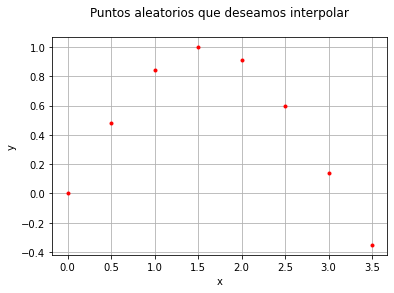

In [3]:
#Definimos los puntos como una Matriz
N = np.array([[0.0, 0.0], 
               [0.5, 0.47942], 
               [1.0 , 0.84147],
               [1.5 , 0.99749],
               [2.0 , 0.90930],
               [2.5 , 0.59847],
               [3.0 , 0.14112],
               [3.5 ,-0.35078]])
#Definimos las columnas de la Matriz 
i=0 
j=1
#Valores de la columna x 
x=[fila[i] for fila in N]
#Valores de la columna y
y=[fila[j] for fila in N]
x=np.array(x)
y=np.array(y)
#Graficamos los puntos aleatorios con ('r.')
plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos aleatorios que deseamos interpolar\n')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
#Creamos la matriz de Vandermonde
X=np.vander(x,increasing=True)
#Imprimimos los primeros 5 renglones y columnas.
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [5]:
#Resolvemos la ecuacion para encontrar los 8 coeficientes
a=la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


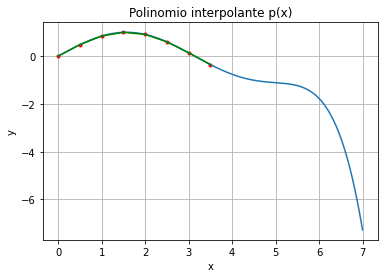

In [6]:
#Graficamos el polinomio interpolante y los puntos interpolados en rojo ('r.')
xs=np.linspace(0,8-1,200)
ys=sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys);
plt.plot(x,np.sin(x),"g")
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

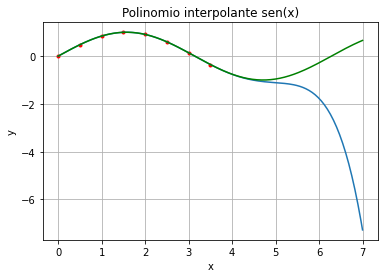

In [9]:
xs=np.linspace(0,8-1,200)
ys=sum([a[k]*xs**k for k in range(0,8)])
xc=np.sin(xs)
plt.plot(x,y,'r.',xs,ys)
plt.grid()
plt.plot(xs,xc,'g')
plt.title('Polinomio interpolante sen(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*   # ***Ejercicio 6.*** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.

In [67]:
#------------------------------------------------RETOMAMOS NUESTRO DATAFRAME DE LA ACTIVIDAD PASADA-------------------------------------------------------------------------------------

#Definimos como la direccion url donde se ubica nuestro archivo
url="https://raw.githubusercontent.com/GerardoxCarreon/FisicaComputacional1/master/Actividad3/Copia%20de%20Climatologia%20diaria_La%20Paz.txt"

#Definimos manualmente los nombres para nuestras columnas mediante la función my_cols
my_cols=[ 'Fecha' , 'Precip' , 'Evap' , 'Tempmax' , 'Tempmin' ]
#Definimos nuestro archivo como un csv con parametros para poder leerlo como Dataframe 
df_clim = pd.read_csv(url, names=my_cols, encoding='cp1252', sep='\s+', header=None, skiprows=19, skipfooter=1, skip_blank_lines=True, engine='python')

#Realizamos una copia del primer DataFrame 
df_cop=df_clim.copy()

#Sustituimos los valores marcados como Nulo en el DataFrame por espacios en blanco
#Para esto deberemos sustituir la copia del primer DataFrame por otra copia
str_Nulo = 'Nulo'
df_cop2 = df_cop.replace(to_replace=str_Nulo, value='', regex=True)

#Ahora convertiremos todos los valores numericos que el DataFrame almaceno como objetos a numeros flotantes
#Los datos que se convertiran en numeros flotantes seran los que se encuentran en las columnas de Precipitacion, Evaporacion, Tempmax y Tempmin
cols_list=['Precip', 'Evap', 'Tempmax', 'Tempmin']
for cols in cols_list:
  df_cop2[cols]=pd.to_numeric(df_cop2[cols], errors='coerce')

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop3=df_cop2.copy()

#Ahora convertiremos la informacion almacenada en la columna de Fecha del DataFrame de objeto a formato datetime
#Utilizamos la función pd.to_datetime que convierte la fecha en datetime 
#Definimos que la fecha este ordenada por dia, mes, año
df_cop3['Fecha']=pd.to_datetime(df_cop3['Fecha'], dayfirst=True).copy()

#Creamos dos nuevas columnas para el DataFrame las cuales contendran el Mes y Año de los datos, para esto extraeremos estos valores de la recien creada columna de Fecha
#Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_cop3['Año'] = df_cop3['Fecha'].dt.year
df_cop3['Mes'] = df_cop3['Fecha'].dt.strftime('%b')

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop4=df_cop3.copy()

#En este paso, convertiremos la columna de Mes de variable numerica a variable categorica con la función .dt.strftime('%b'), esto con la finalidad de poder utilizar estas variables como etiquetas en una posible gráfica de datos
df_cop4.drop('Mes', axis=1, inplace=True)
df_cop4['Mes'] = df_cop3['Fecha'].dt.strftime('%b')

#Nuevamente realizamos una copia del ultimo DataFrame
df_cop5_ts=df_cop4.copy()
#Hacemos que la variable 'Fecha' sea el nuevo indice de nuestro DataFrame
df_cop5_ts=df_cop5_ts.set_index('Fecha')
#Comprobamos que se haya cambiado el indice
print('INFORMACION DE DATAFRAME\n')
df_cop5_ts.info()
print('')
print('ENCABEZADO DE DATAFRAME\n')
print(df_cop5_ts.head())
print('')
print('PIE DE DATAFRAME\n')
print(df_cop5_ts.tail())
#------------------------------------------------------FIN DE NUESTRO DATAFRAME DE LA ACTIVIDAD PASADA-------------------------------------------------------------------------------------

INFORMACION DE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18661 entries, 1961-04-18 to 2017-12-31
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Precip   18659 non-null  float64
 1   Evap     1238 non-null   float64
 2   Tempmax  18658 non-null  float64
 3   Tempmin  18657 non-null  float64
 4   Año      18661 non-null  int64  
 5   Mes      18661 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1020.5+ KB

ENCABEZADO DE DATAFRAME

            Precip  Evap  Tempmax  Tempmin   Año  Mes
Fecha                                                
1961-04-18     0.0   NaN     33.0      NaN  1961  Apr
1961-04-19     0.0   NaN     31.0     12.5  1961  Apr
1961-04-20     0.0   NaN     31.0     12.0  1961  Apr
1961-04-21     0.0   NaN     33.0     16.0  1961  Apr
1961-04-22     0.0   NaN     36.0     16.0  1961  Apr

PIE DE DATAFRAME

            Precip  Evap  Tempmax  Tempmin   Año  Mes
Fec

In [58]:
#Funcion que convierte la fecha a decimal
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [69]:
#Definimos un nuevo DataFrame que es con el que se va a trabajar
df_tm=df_cop4
df_tm.head()
#Eliminamos las columnas que nos son necesarias para este caso
del(df_tm['Precip'],df_tm['Evap'],df_tm['Año'],df_tm['Mes'])
#Imprimimos el encabezado del DataFrame
df_tm.head()

,Fecha,Tempmax,Tempmin
0,1961-04-18,33.0,NaN
1,1961-04-19,31.0,12.5
2,1961-04-20,31.0,12.0
3,1961-04-21,33.0,16.0
4,1961-04-22,36.0,16.0


In [41]:
#Definimos la longitud del DataFrame
N=len(df_tm) 

df_tm['FechaDecimal']=df_tm['Tempmax']
print(df_tm)

for o in range(N): 
  
  df_tm['FechaDecimal'].iloc[o]=toYearFraction(df_tm['Fecha'].iloc[o])

del(df_tm['Fecha']) 

print(df_tm)

           Fecha  Tempmax  Tempmin  FechaDecimal
0     1961-04-18     33.0      NaN          33.0
1     1961-04-19     31.0     12.5          31.0
2     1961-04-20     31.0     12.0          31.0
3     1961-04-21     33.0     16.0          33.0
4     1961-04-22     36.0     16.0          36.0
...          ...      ...      ...           ...
18656 2017-12-27     25.0     13.0          25.0
18657 2017-12-28     27.0     13.0          27.0
18658 2017-12-29     27.0     16.0          27.0
18659 2017-12-30     29.0     13.0          29.0
18660 2017-12-31     29.0     16.0          29.0

[18661 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


       Tempmax  Tempmin  FechaDecimal
0         33.0      NaN   1961.293151
1         31.0     12.5   1961.295890
2         31.0     12.0   1961.298630
3         33.0     16.0   1961.301370
4         36.0     16.0   1961.304110
...        ...      ...           ...
18656     25.0     13.0   2017.986301
18657     27.0     13.0   2017.989041
18658     27.0     16.0   2017.991781
18659     29.0     13.0   2017.994521
18660     29.0     16.0   2017.997260

[18661 rows x 3 columns]


In [42]:
#Construimos la Matriz de Vandermonde
x=df_tm['FechaDecimal']
X=np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (18661, 2)


In [43]:
df_tm.isnull().sum()
df_tm.fillna(df_tm.mean(), inplace=True)

In [44]:

ymax=np.array(df_tm['Tempmax'])
ymin=np.array(df_tm['Tempmin'])

In [45]:
#Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y 
amax = la.solve(X.T @ X, X.T @ ymax)
amin = la.solve(X.T @ X, X.T @ ymin)
print('Para Tmax')
print(amax)
print('Para Tmin')
print(amin)

Para Tmax
[-4.04779505e+01  3.53455317e-02]
Para Tmin
[-3.80983607e+01  2.60904946e-02]


In [55]:
#Obtuvimos que a0 y a1 de la Temperatura Máxima son:
print('Para la Temperatura Máxima:\n')
print('a0≈ -40.4779505\n','a1≈ 0.0353455317\n')
print('Para la Temperatura Minima:\n')
print('a0≈ -38.0983607\n','a1 ≈0.0260904946\n')

Para la Temperatura Máxima:

a0≈ -40.4779505
 a1≈ 0.0353455317

Para la Temperatura Minima:

a0≈ -38.0983607
 a1 ≈0.0260904946



In [56]:
#Obteniendo las aproximaciones lineales para cada temperatura tenemos:
print('TMax= -40.4779505+0.0353455317t\n')
print('Tmin= -38.0983607+0.0260904946t\n')
#Concluyendo asi que durante el periodo analizado, la temperatura máxima aumento y la temperatura minima tambien
print('Ambas temperaturas sufrieron un aumento en sus valores en el periodo analizado')

TMax= -40.4779505+0.0353455317t

Tmin= -38.0983607+0.0260904946t

Ambas temperaturas sufrieron un aumento en sus valores en el periodo analizado
